In [12]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import glob
sns.set(style="whitegrid", font_scale=1.6)
%matplotlib inline

In [13]:
def read_test_result(fname):
    _d = pd.read_json(fname)
    _d['zone'] = fname[:2]
    return _d

In [14]:
# Read the general DNS stats
d1 = pd.concat([read_test_result(f) for f in glob.glob('*/*-domain-test-results.json')])

In [15]:
d1.head()

,domain,error_type,perc,test,zone
0,3896,Other,0.163258,dns,NZ
1,23510,noaa,0.985164,dns,NZ
2,24974,nosoa,1.046512,dns,NZ
3,2113269,ok,88.554536,dns,NZ
4,102217,refused,4.283307,dns,NZ


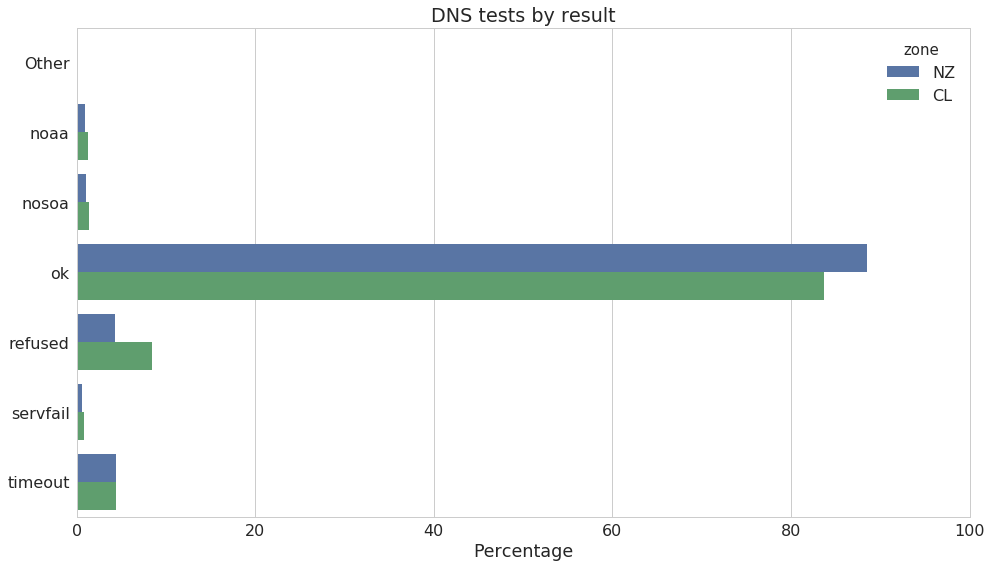

In [20]:
plt.figure(figsize=(16,9))
ax = sns.barplot(data=d1, x='perc', y='error_type', hue='zone')
ax.set(xlim=[0, 100], title='DNS tests by result', ylabel='', xlabel='Percentage')
plt.savefig('comparison-basic-DNS-test.png')

In [ ]:
# Compare DNS vs EDNS results


In [18]:
# Compare EDNS with EDNS1
d3 = pd.concat([read_test_result(f) for f in glob.glob('*/*-EDNS-EDNS1.json')])

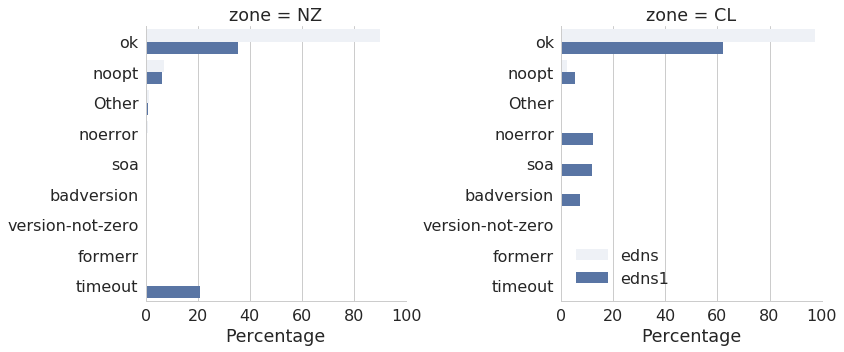

In [47]:
# plt.figure(figsize=(16,9))
g3 = sns.FacetGrid(d3, col="zone", size=5, aspect=1.2, sharey=True)
ax = g3.map(sns.barplot, 'perc', 'error_type', 'test', ci=None)
plt.legend(loc='lower left')
ax.set(xlim=[0, 100], ylabel='', xlabel='Percentage')
plt.savefig('comparison-EDNS-EDNS1.png')

In [49]:
# Compare EDNS0 with EDNS1
d4 = pd.concat([read_test_result(f) for f in glob.glob('*/*-EDNS1-EDNS1OPT.json')])

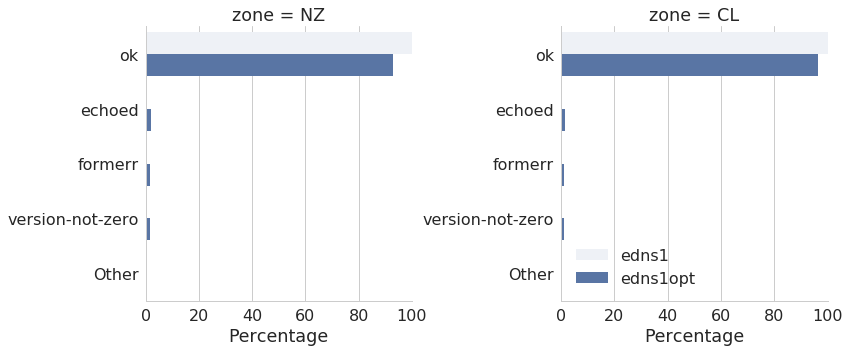

In [50]:
# plt.figure(figsize=(16,9))
g4 = sns.FacetGrid(d4, col="zone", size=5, aspect=1.2, sharey=True)
ax = g4.map(sns.barplot, 'perc', 'error_type', 'test', ci=None)
plt.legend(loc='lower left')
ax.set(xlim=[0, 100], ylabel='', xlabel='Percentage')
plt.savefig('comparison-EDNS1-EDNS1OPT.png')